<a href="https://colab.research.google.com/github/kimheeseo/LDPC_study/blob/main/multi_variable_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고사이트 : https://youtu.be/Aw-E-jw3WaE

In [195]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
filename='/content/drive/MyDrive/Colab Notebooks/data/data-01.CSV'

In [197]:
loaded_data=pd.read_csv(filename)
loaded_data.head()

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


In [198]:
x_data = loaded_data.iloc[ :, 0:-1]
t_data = loaded_data.iloc[ :, [-1]]

# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

x_data.ndim =  2 , x_data.shape =  (24, 3)
t_data.ndim =  2 , t_data.shape =  (24, 1)


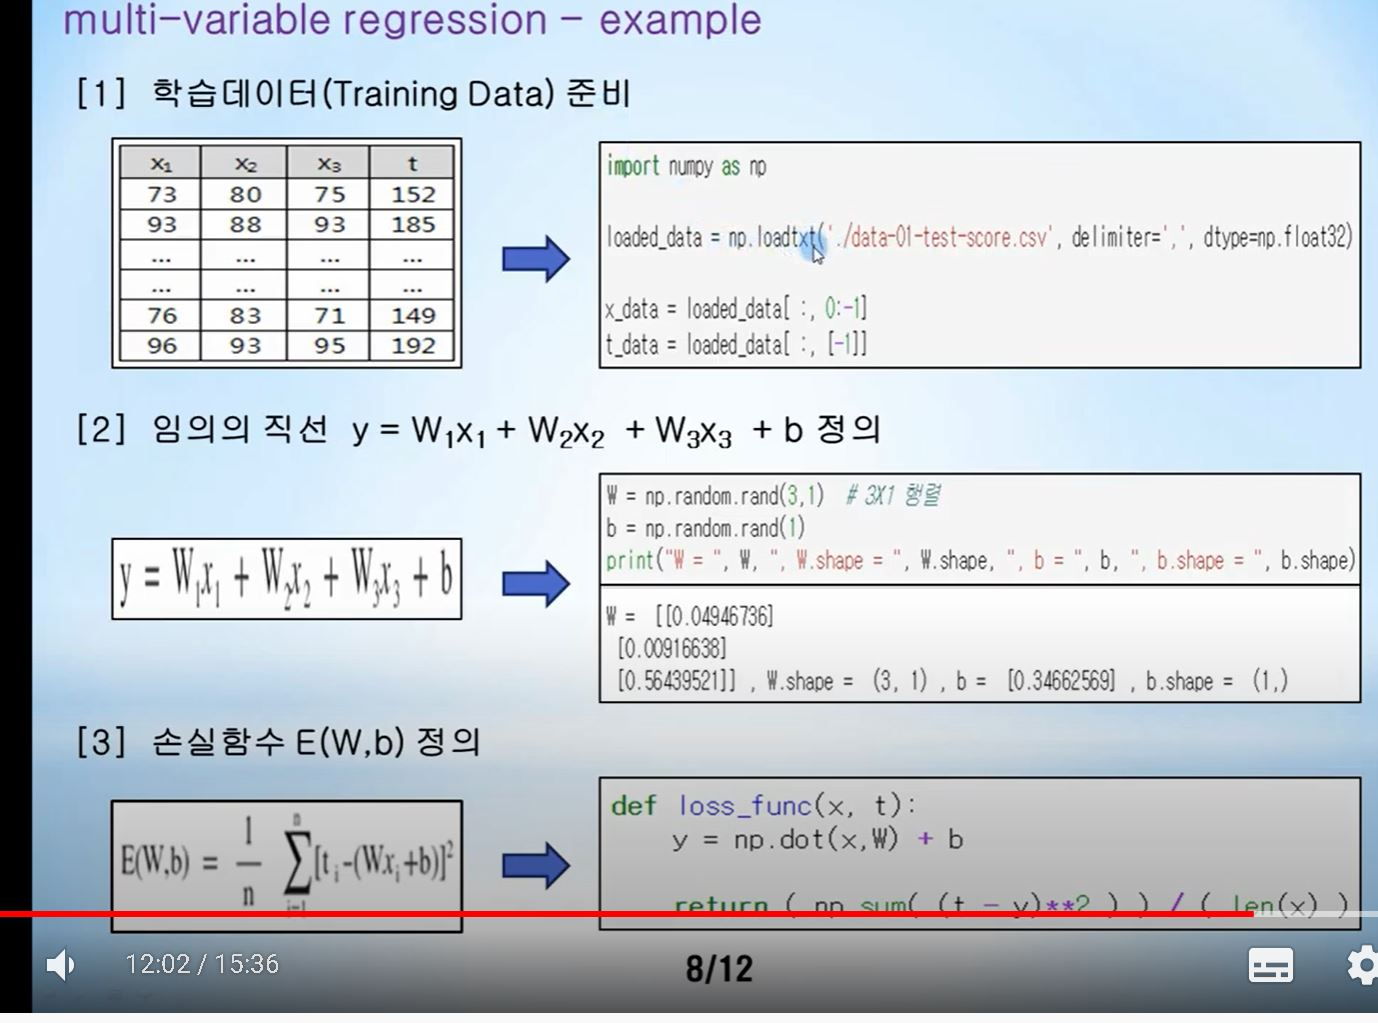

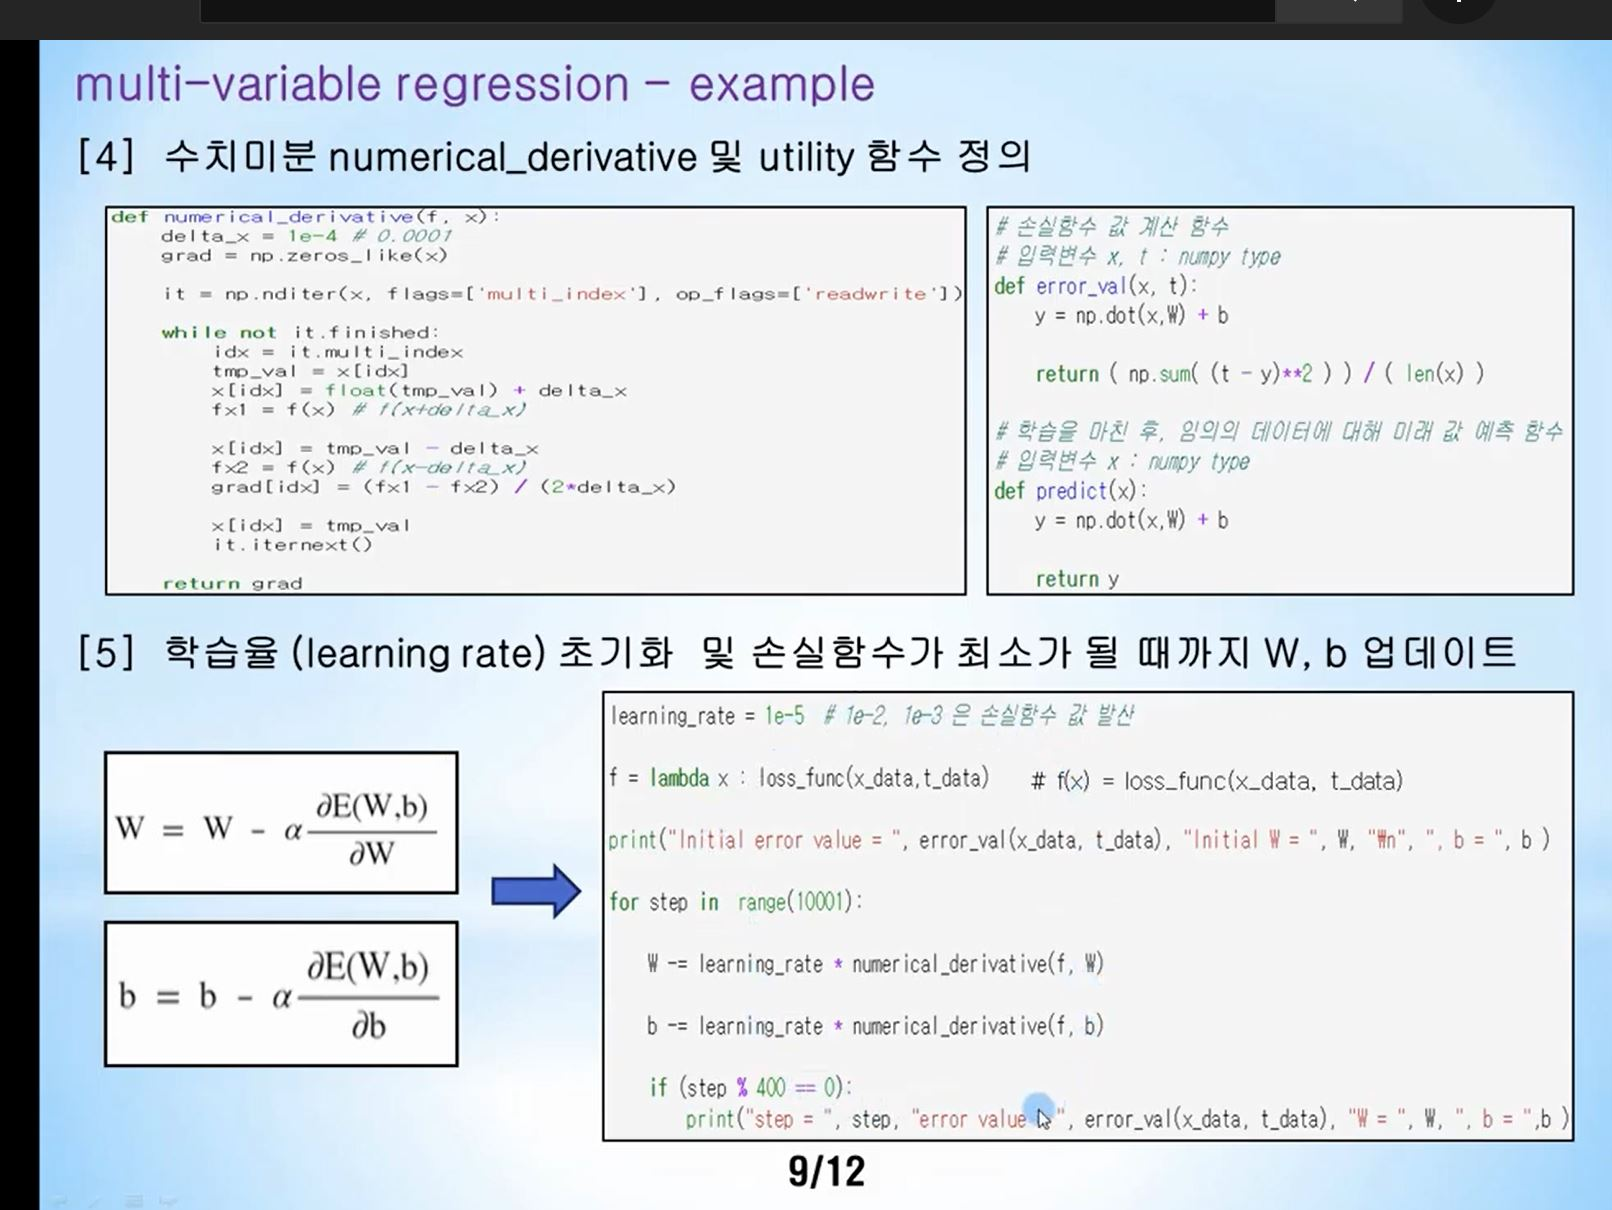

In [199]:
W = np.random.rand(3,1)  # 3X1 행렬
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.98291579]
 [0.96358044]
 [0.59902264]] , W.shape =  (3, 1) , b =  [0.51542059] , b.shape =  (1,)


In [200]:
def loss_func(x, t):
    y = np.dot(x,W) + b
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )
#t값은 target값, y값은 예측값

In [201]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [202]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y

In [203]:
learning_rate = 1e-5  # 1e-2, 1e-3 은 손실함수 값 발산

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(10001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

Initial error value =  152    1783.846824
dtype: float64 Initial W =  [[0.98291579]
 [0.96358044]
 [0.59902264]] 
 , b =  [0.51542059]
step =  0 error value =  152    668.792559
dtype: float64 W =  [[0.91546438]
 [0.89594816]
 [0.53002694]] , b =  [0.51491727]
step =  400 error value =  152    17.046214
dtype: float64 W =  [[0.76287726]
 [0.73543364]
 [0.52618052]] , b =  [0.51422976]
step =  800 error value =  152    14.144163
dtype: float64 W =  [[0.71933531]
 [0.68950456]
 [0.61323145]] , b =  [0.51419199]
step =  1200 error value =  152    12.059115
dtype: float64 W =  [[0.68058199]
 [0.65241355]
 [0.68702152]] , b =  [0.51404809]
step =  1600 error value =  152    10.555903
dtype: float64 W =  [[0.64605868]
 [0.62258974]
 [0.74962347]] , b =  [0.5138144]
step =  2000 error value =  152    9.468052
dtype: float64 W =  [[0.61527649]
 [0.59873091]
 [0.80278064]] , b =  [0.51350471]
step =  2400 error value =  152    8.677524
dtype: float64 W =  [[0.58780693]
 [0.57975844]
 [0.8479598

In [204]:
test_data = np.array([100, 98, 81])

predict(test_data) 

array([179.38238732])